# Single-qubit and multi-qubit states, quantum teleportation

### Installing necessary packages

Before we begin, you will need to install some prerequisites into your environment. Run the cell below to complete these installations. At the end, the cell outputs will be cleared.

In [2]:
# !pip install -U -r resources/requirements.txt

from IPython.display import clear_output
clear_output()

# Single-qubit states

The single qubit states can be written down generally as 

$$\sqrt{1-p}\vert0\rangle + e^{i\phi}\sqrt{p}\vert1\rangle$$

Here, $p$ is the probability that a measurement of the state in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $1$, and $\phi$ is the phase between the two computational basis states. 

Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.

Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

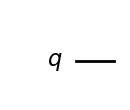

In [3]:
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

The above quantum circuit does not contain any gates. Therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state. 

To see this clearly, let's create the statevector $\vert0\rangle$. In `Qiskit`, you can do this using the following:

In [4]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')

You can see what's contained in the object `sv`:

In [5]:
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


The vector itself can be found by writing

In [6]:
sv.data

array([1.+0.j, 0.+0.j])

Recall that $$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [7]:
new_sv = sv.evolve(mycircuit)

Once again, you can look at the new statevector by writing

In [8]:
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


As you can see, the statevector hasn't changed. You can compute the projection of `new_sv` onto `sv` by writing

In [9]:
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv)

1.0

As you can see, the projection of `new_sv` onto `sv` is 1, indicating that the two states are identical. You can visualize this state using the `qsphere` by writing

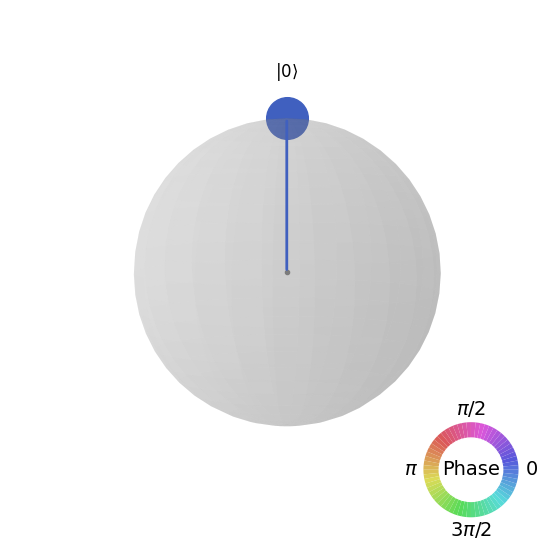

In [10]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv.data)

Applying an $X$ gate flips the qubit from the state $\vert0\rangle$ to the state $\vert1\rangle$. To see this clearly, we will first create a single-qubit quantum circuit with the $X$ gate.

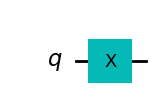

In [11]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw('mpl')

Now, we can apply this circuit onto our state by writing

In [12]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


As you can see, the statevector now corresponds to that of the state $\vert1\rangle$. Recall that

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

Now, the projection of `new_sv` onto `sv` is 

In [13]:
state_fidelity(new_sv, sv)

0.0

This is not surprising. The states $\vert0\rangle$ and $\vert1\rangle$ are orthogonal. Therefore, $\langle0\vert1\rangle = 0$. The state can be shown on the `qsphere` by writing

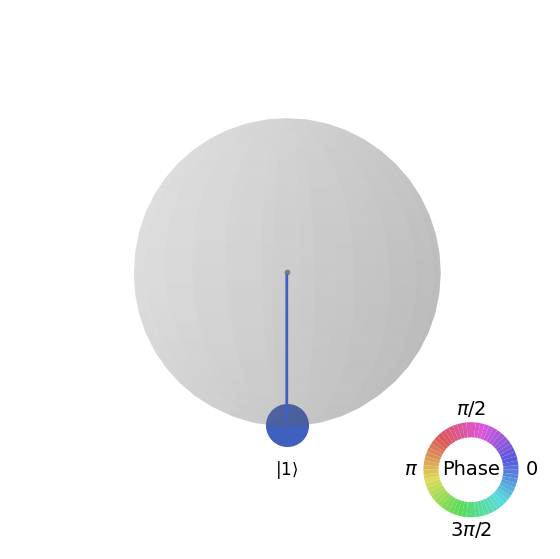

In [14]:
plot_state_qsphere(new_sv.data)

Similarly, we can create the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$
by applying a Hadamard gate. Here is how we can create the state and visualize it in `Qiskit`:

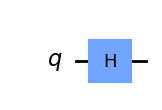

In [15]:
sv = Statevector.from_label('0')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


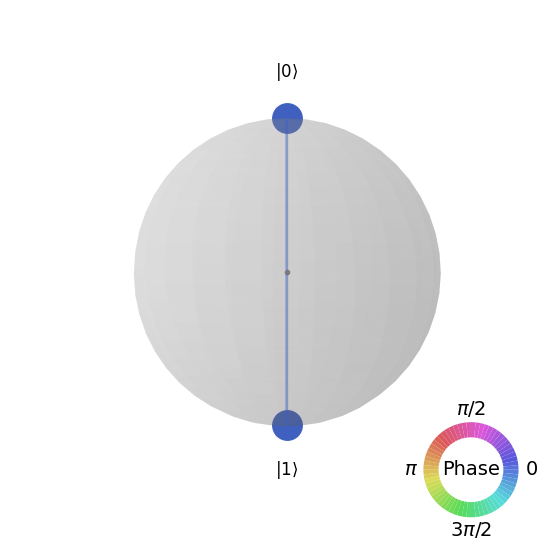

In [16]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

As you can see above, the state has equal components of $\vert0\rangle$ and $\vert1\rangle$. The size of the circle is proportional to the probability of measuring each basis state in the statevector. As a result, you can see that the size of the circles is half of the size of the circles in our previous visualizations.

We can also create other superpositions with different phase. Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


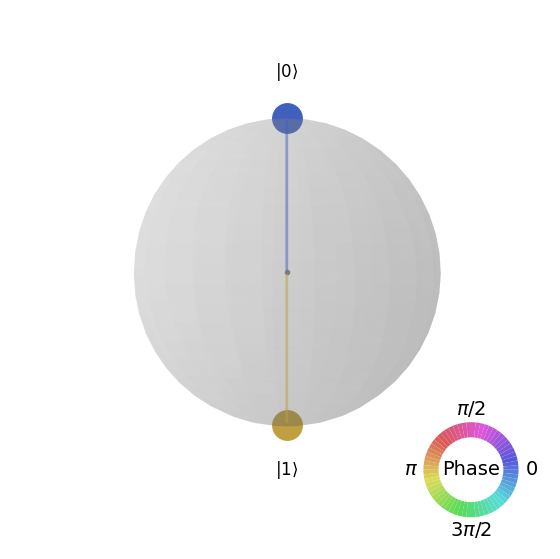

In [17]:
sv = Statevector.from_label('1')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)

new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

This time, the bottom circle, corresponding to the basis state $\vert1\rangle$ has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

Other phases can also be created by applying different gates. The $T$ and $S$ gates apply phases of $+\pi/4$ and $+\pi/2$, respectively. The widget below helps you see different gates, and their actions on single-qubit quantum states.

In [18]:
from resource.qiskit_textbook.widgets import gate_demo
gate_demo(qsphere=True)

ModuleNotFoundError: No module named 'resource'

# Multi-qubit states

Similar to the discussion above, you can also explore multi-qubit gates in `Qiskit`. You learned about Bell states, and how they can be generated using quantum gates. We will demonstrate below how to create the Bell state $$\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)$$ from the state $\vert00\rangle$. We'll start by visualizing the state $\vert00\rangle$ using the same procedure:

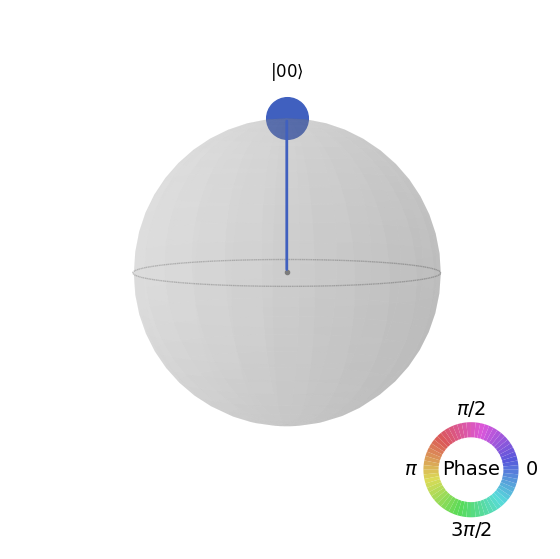

In [19]:
sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

Next, we use the Hadamard gate described above, along with a controlled-X gate, to create the Bell state.

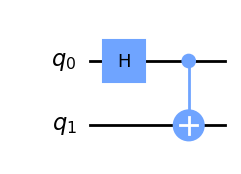

In [20]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

The result of this quantum circuit on the state $\vert00\rangle$ is found by writing

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


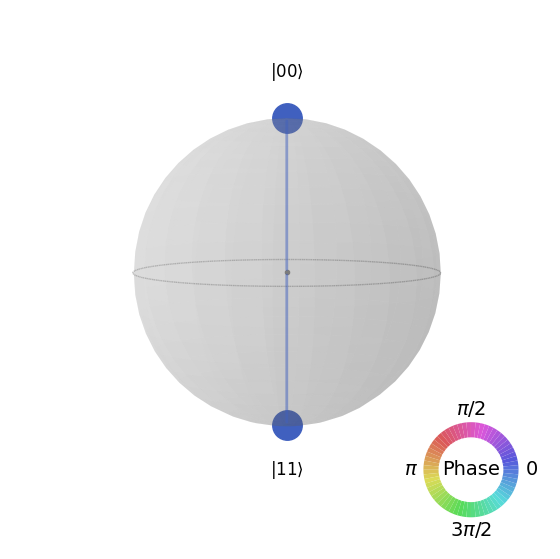

In [21]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

Note how this looks very similar to a single-qubit superposition with zero phase. Following entanglement, it is no longer possible to treat the two qubits individually, and they must be considered to be one system. 

To see this clearly, we can see what would happen if we measured the Bell state above 1000 times.

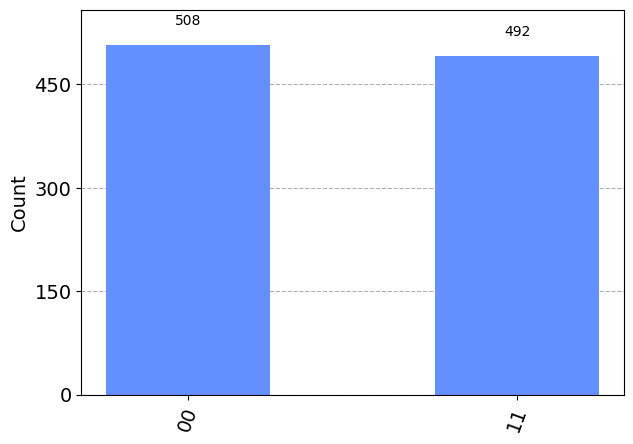

In [22]:
counts = new_sv.sample_counts(shots=1000)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

As you can see above, all measurements give either the result `00` or `11`. In other words, if the measurement outcome for one of the qubits is known, then the outcome for the other is fully determined.

### Ungraded exercise 1

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle + \vert10\rangle\right)$$ using a similar procedure?

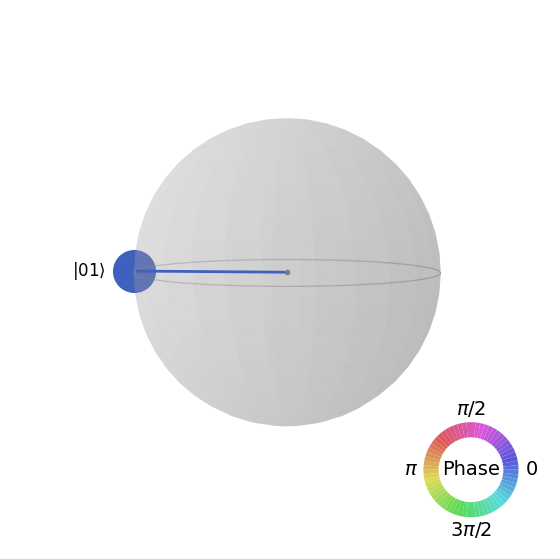

In [23]:
sv = Statevector.from_label('01')
plot_state_qsphere(sv.data)

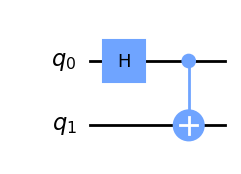

In [24]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


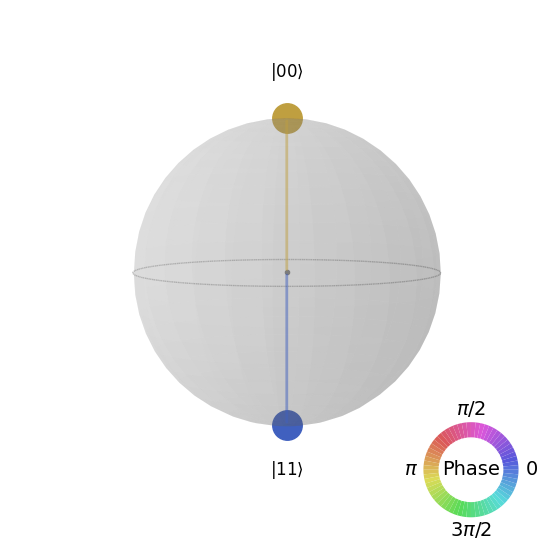

In [25]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

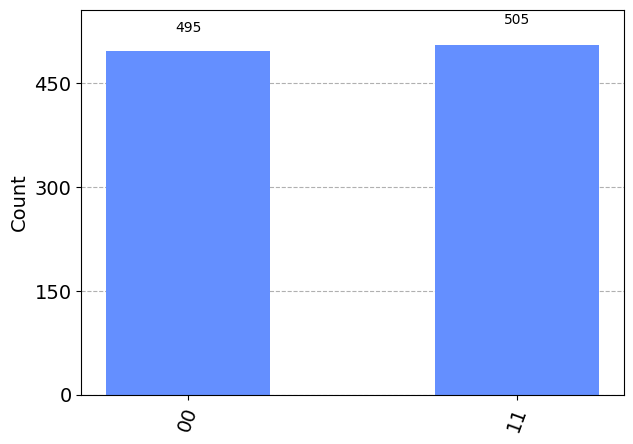

In [26]:
counts = new_sv.sample_counts(shots=1000)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Ungraded exercise 2

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$$ using a similar procedure?

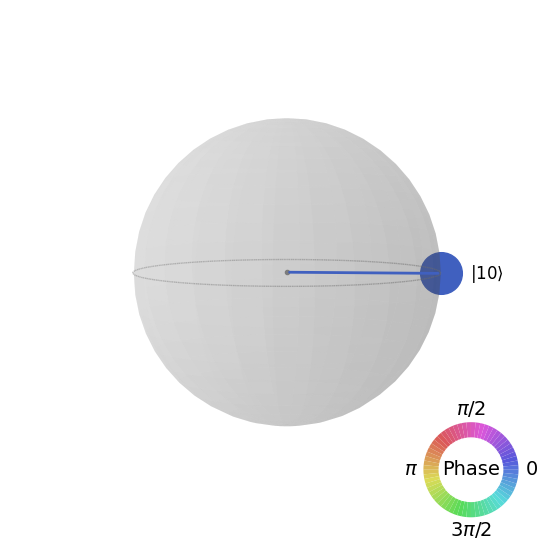

In [27]:
sv = Statevector.from_label('10')
plot_state_qsphere(sv.data)

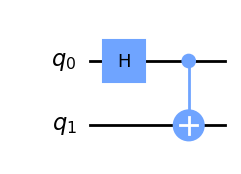

In [28]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


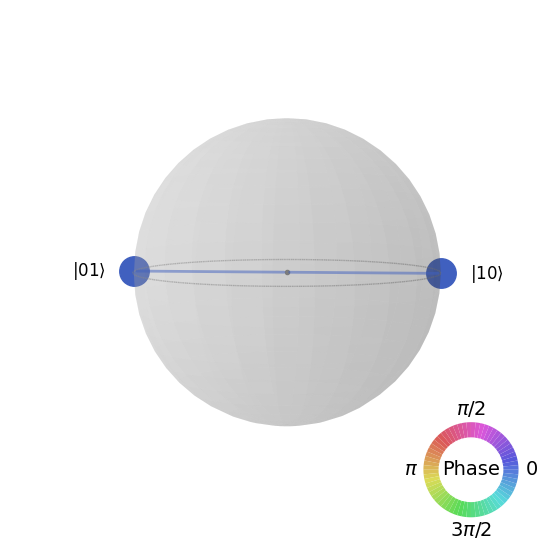

In [29]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

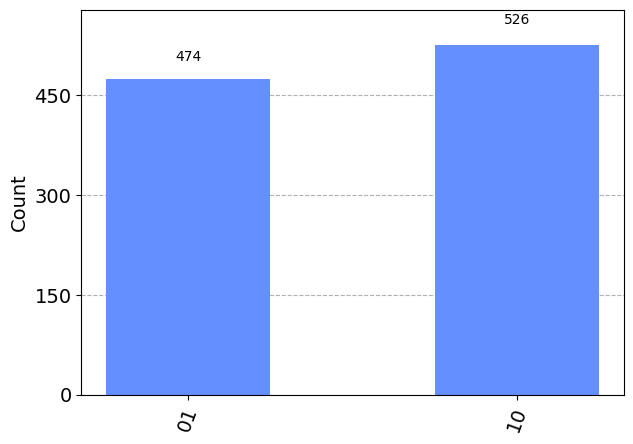

In [30]:
counts = new_sv.sample_counts(shots=1000)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Measurements

In the above example, we simulated the action of a measurement by sampling counts from the statevector. A measurement can explicitly be inserted into a quantum circuit as well. Here is an example that creates the same Bell state and applies a measurement.

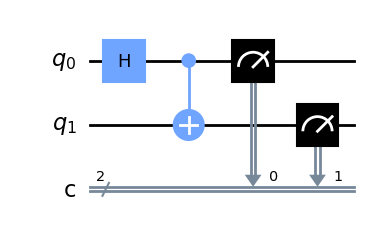

In [31]:
mycircuit = QuantumCircuit(2, 2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure([0,1], [0,1])
mycircuit.draw('mpl')

Two new features appeared in the circuit compared to our previous examples. 

- First, note that we used a second argument in the `QuantumCircuit(2,2)` command. The second argument says that we will be creating a quantum circuit that contains two qubits (the first argument), and two classical bits (the second argument).
- Second, note that the `measure` command takes two arguments. The first argument is the set of qubits that will be measured. The second is the set of classical bits onto which the outcomes from the measurements of the qubits will be stored.

Since the above quantum circuit contains non-unitaries (the measurement gates), we will use `Qiskit`'s built-in `Aer` simulators to run the circuit. To get the measurement counts, we can use the following code:

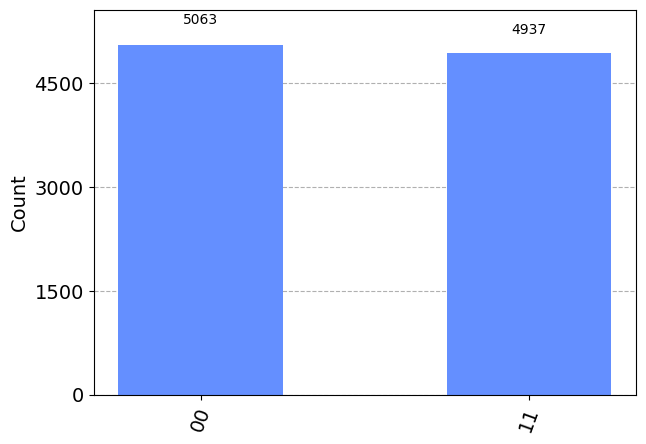

In [32]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

As you can see, the measurement outcomes are similar to when we sampled counts from the statevector itself.

# Graded exercise 1: Quantum teleportation

In this graded exercise, you will teleport the quantum state 
$$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` and `q2` for this. Recall that Alice owns `q1`, and Bob owns `q2`.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.

This exercise guides you through each of these steps.

### Initializing the state to be teleported

First, create a quantum circuit that creates the state $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ You can do this by using `Qiskit`'s `initialize` function.

In [33]:
def initialize_qubit(given_circuit, qubit_index):
    
    import numpy as np
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    vector = [np.sqrt(0.7),np.sqrt(0.3)]
    given_circuit.initialize(vector, qubit_index)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

Next, we need to create entanglement between Alice's and Bob's qubits.

In [34]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.h(qubit_Alice)
    given_circuit.cx(qubit_Alice, qubit_Bob)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

Next, we need to do a Bell measurement of Alice's qubits.

In [35]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.cx(qubit1_Alice, qubit2_Alice)
    given_circuit.h(qubit1_Alice)
    given_circuit.barrier()
    given_circuit.measure(qubit1_Alice,clbit1_Alice)
    given_circuit.measure(qubit2_Alice,clbit2_Alice)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

Finally, we apply controlled operations on Bob's qubit. Recall that the controlled operations are applied in this order:

- an $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- a $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.

In [36]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1)
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

The next lines of code put everything together. **You do not need to modify anything below, but you will need to run the cell.**

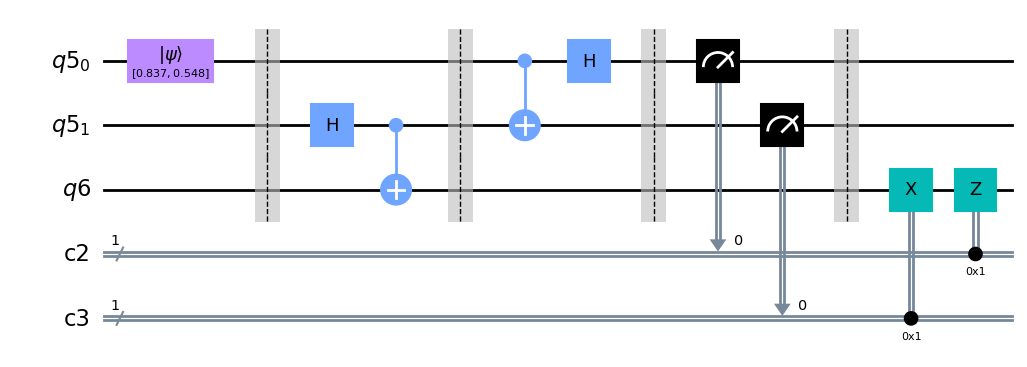

In [38]:
### imports
from qiskit import QuantumRegister, ClassicalRegister

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

### Look at the complete circuit
mycircuit.draw('mpl')